![title](Title_background.png)

In [12]:
# Machine Learning Institute
# Author of the current version: Ivan Zhdankin
# Version: 1.0 (17.06.2019)
# License: MIT
# Email: ivan.zhdankin@thalesians.com
# Notes: tested on Windows 10 with Python 3.6

# Classification

### Objectives
 - Learn how to perform some exploration of the data: missing values, correlation, output visualization
 - Learn how to do feature selection using random forests
 - Learn how to construct a decision tree and random forest
 - Learn how to construct ROC curves
 - Learn how to perform cross-validation in classification problem using AUC (area under the curve)

# Classification problem in insurance

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

In [1]:
#All libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image as PImage
from subprocess import check_call
from IPython.display import Image 
import pydotplus
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [122]:
#Loading the data, update the path
train=pd.read_csv('train.csv')

In [3]:
train.shape

(595212, 59)

In [51]:
#First look at the data
train.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [50]:
#Some info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [6]:
#Some descriptive statistics
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


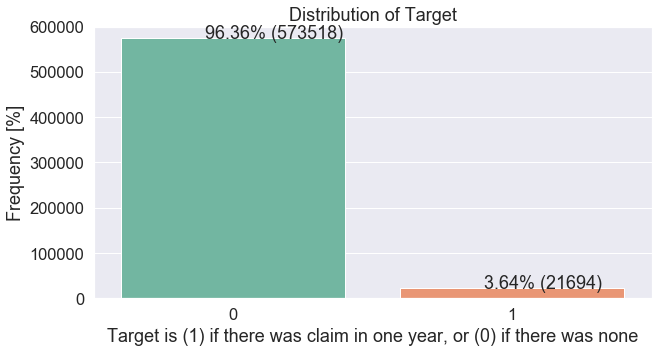

In [20]:
#Let us see the traget
ax = sns.countplot(x = train['target'] ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=round(train.shape[0], -len(str(train.shape[0]))+1))
for p in ax.patches:
    ax.annotate('{:.2f}% ({})'.format(100*p.get_height()/len(train['target']), p.get_height()), 
                (p.get_x()+ 0.3, p.get_height()+10))

plt.title('Distribution of Target')
plt.xlabel('Target is (1) if there was claim in one year, or (0) if there was none')
plt.ylabel('Frequency [%]')
plt.show()

In [116]:
#check for missing variables
vars_with_missing = []
#there seem to be no missing values
print(train.isnull().sum()[train.isnull().sum() != 0])
print(np.where(pd.isnull(train)))
print(np.where(train.applymap(lambda x: x == '')))

Series([], dtype: int64)
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [123]:
#drop data with too many missing variables
vars_to_drop = ['id'] # id not needed
train.drop(vars_to_drop, inplace=True, axis=1)
train.shape


(595212, 58)

In [55]:
# Compute the correlation matrix
corr_mat = np.round(train.corr(),2)
corr_mat.shape

(58, 58)

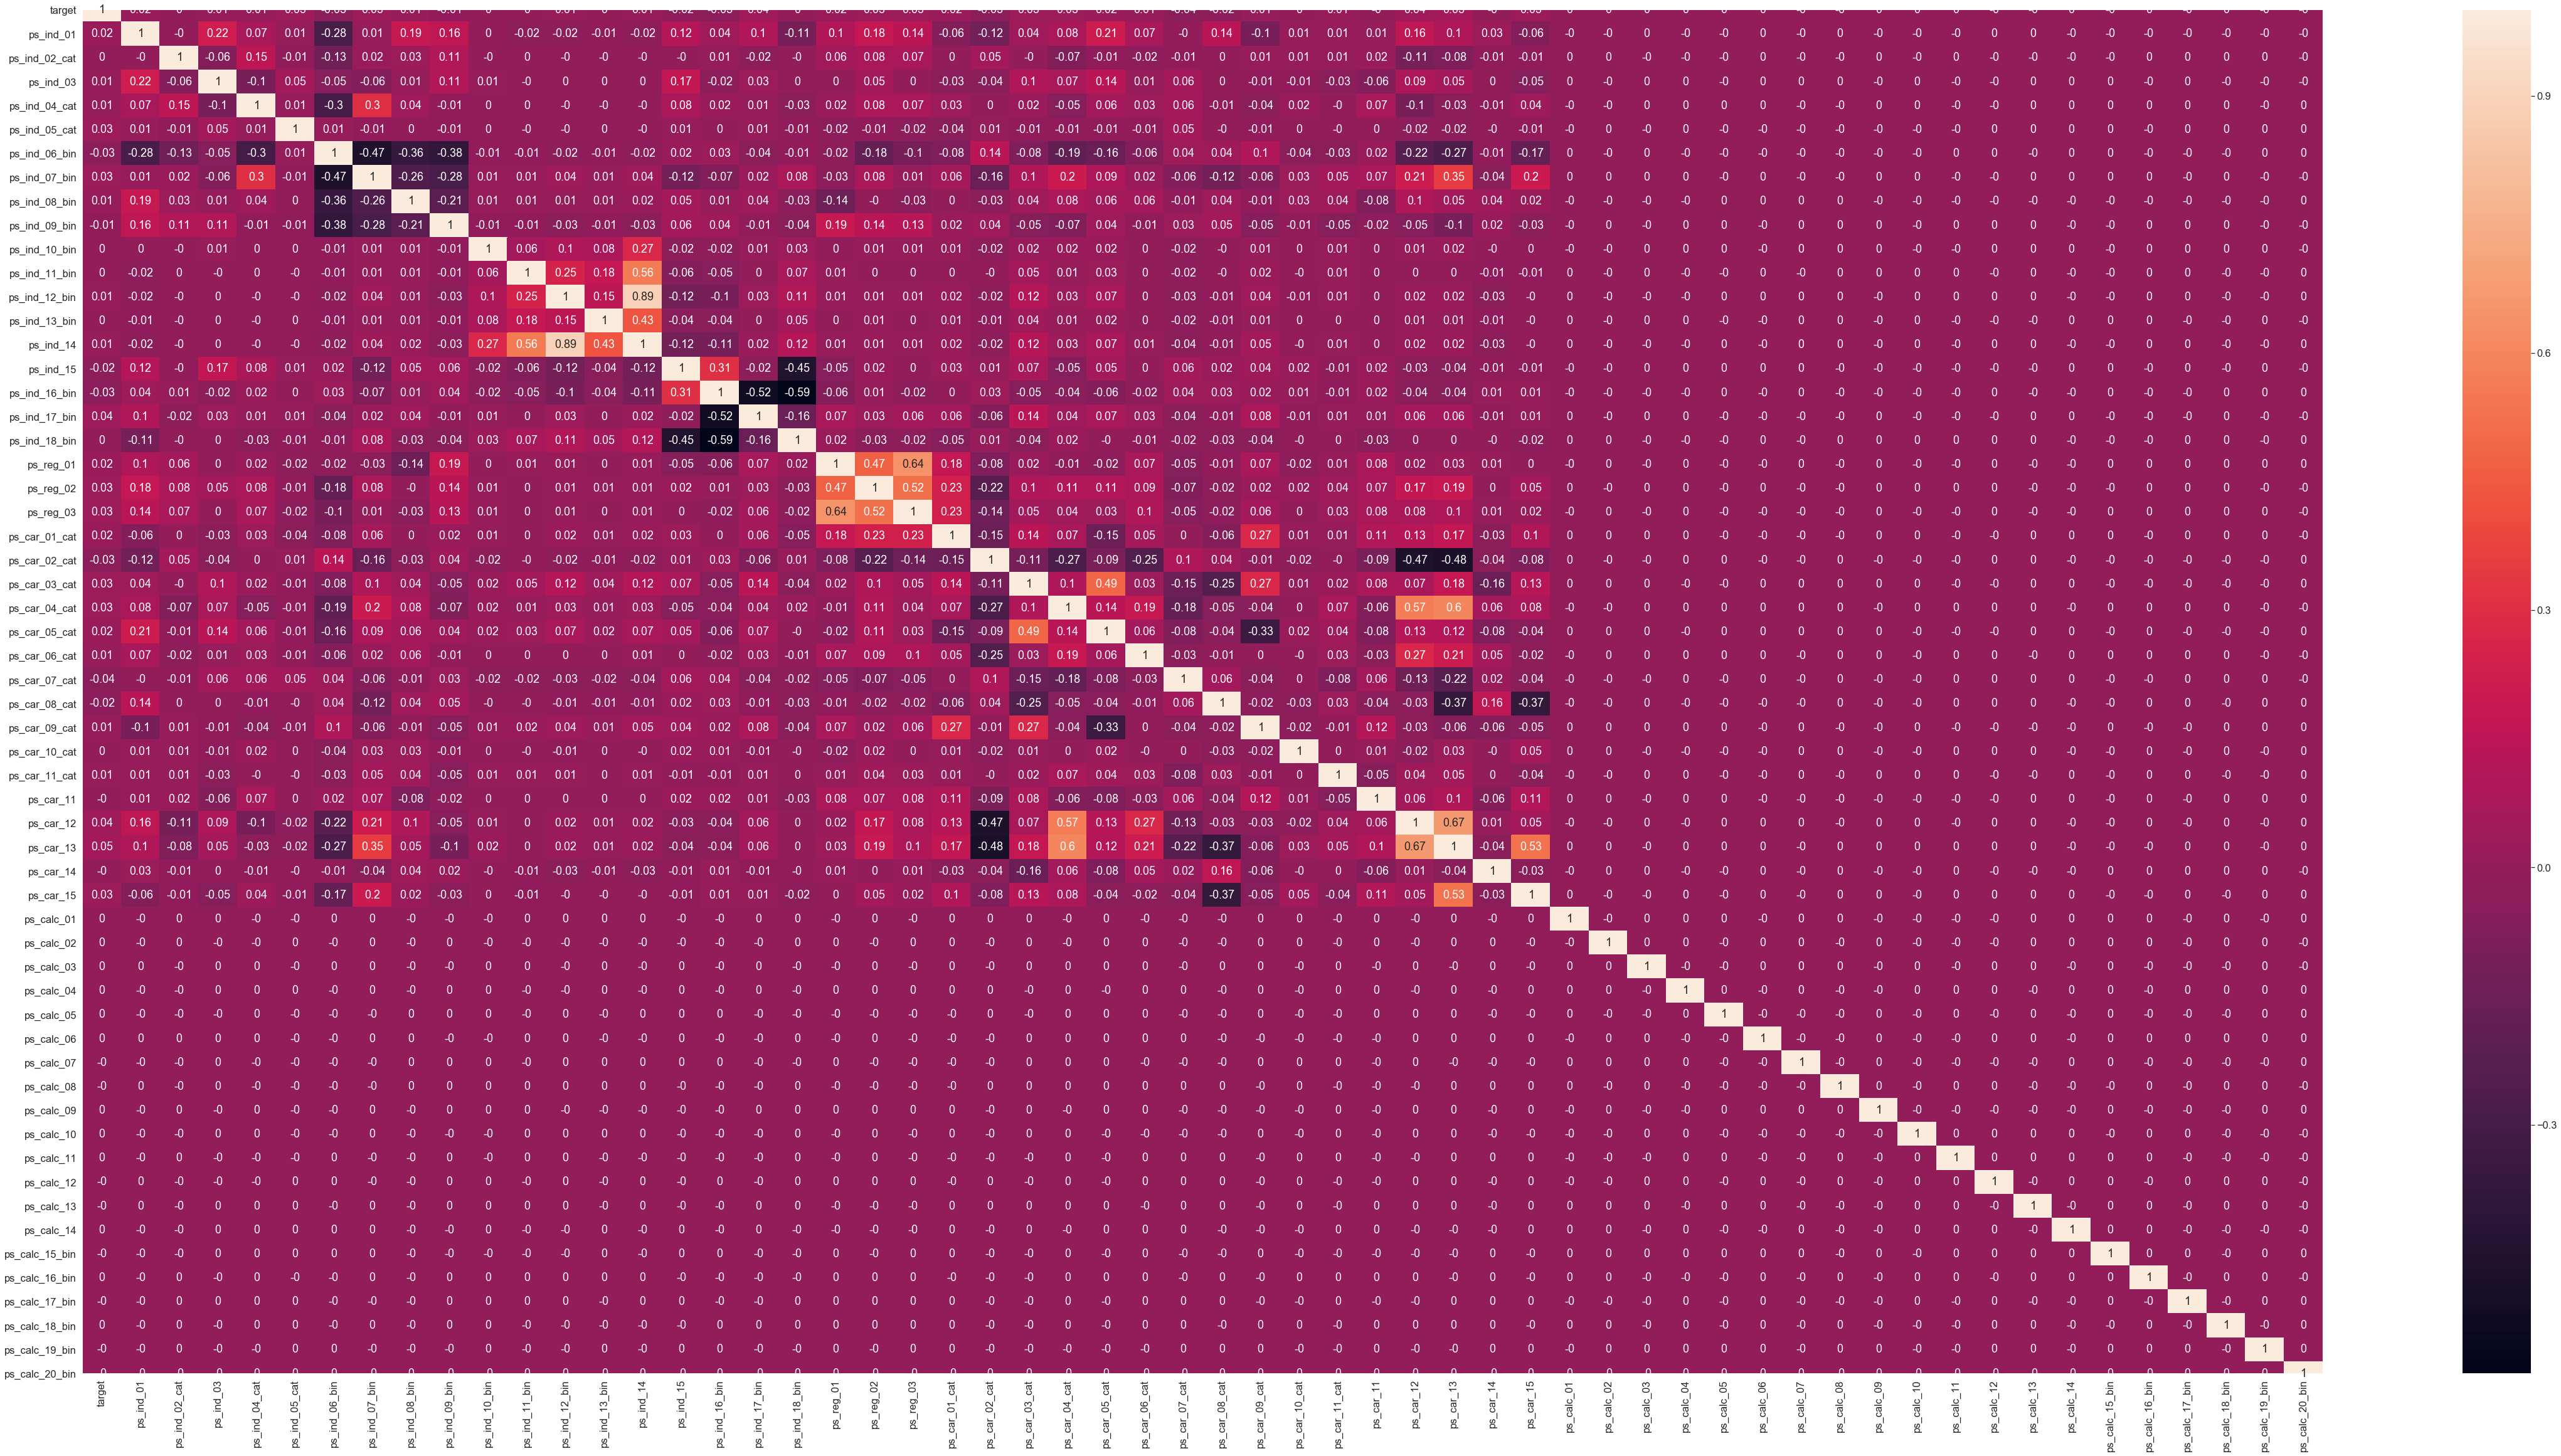

In [59]:
# Draw the heatmap
plt.figure(figsize=(80,40))
sns.heatmap(corr_mat,annot=True)

In [124]:
#get rid of uncorrelated variables to reduce the dimensionality of the problem
# From the correlation matrix above we can clearly identify 20 variables that are not correlated with any other variables 
# (except with themselves). So we can remove them without further ado.


prefix = 'ps_calc_'
uncorr_vars_to_drop = [prefix + '0' + str(id) for id in range(1,10)]
uncorr_vars_to_drop.extend([prefix + str(id) for id in range(10,15)])
uncorr_vars_to_drop.extend(['ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',\
                            'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'])

train.drop(uncorr_vars_to_drop, inplace=True, axis=1)
train.shape


(595212, 38)

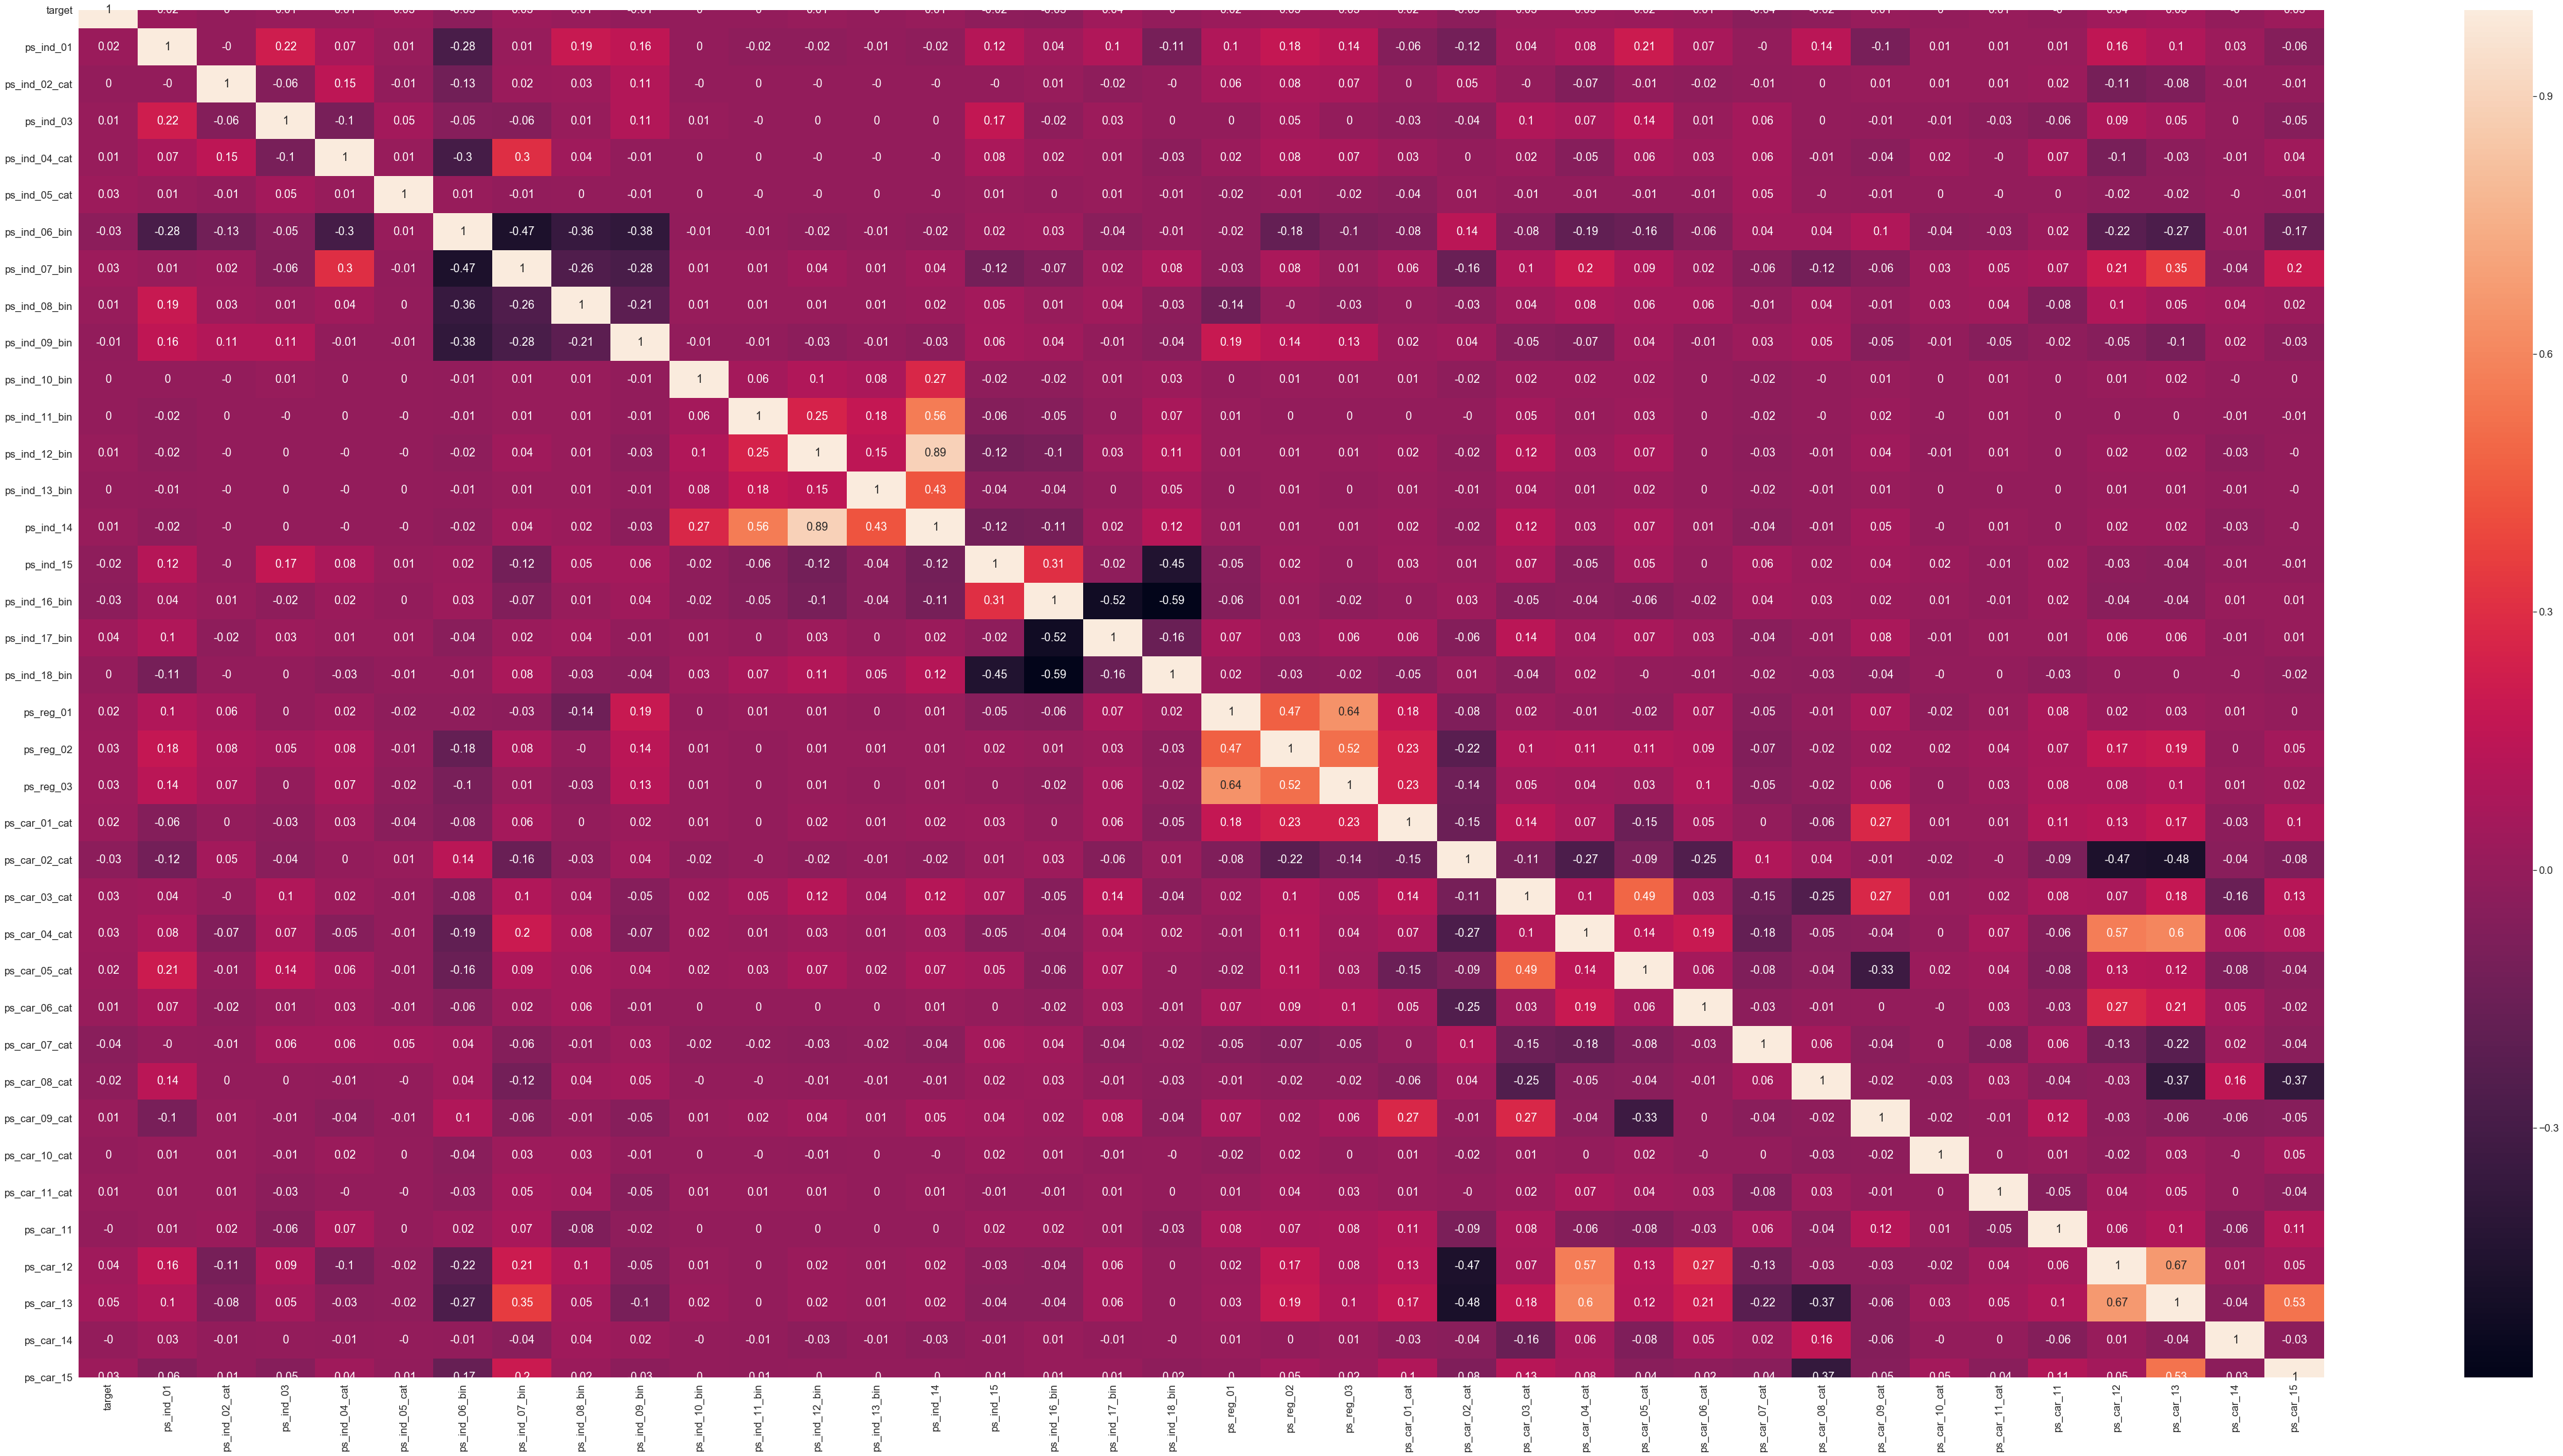

In [63]:
#Visualize the output
corr_mat = np.round(train.corr(),2)
corr_mat.shape
plt.figure(figsize=(80,40))
sns.heatmap(corr_mat,annot=True)

In [65]:
#We want to estimate the feature importance using the Random Forests
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['target'],axis=1), train.target)
features = train.drop(['target'],axis=1).columns.values

In [70]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
x_lbls = [round(i,5) for i in x]

trace2 = go.Bar(
    x=x ,
    y=y,
    text=x_lbls,
    textposition='auto',
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 500, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

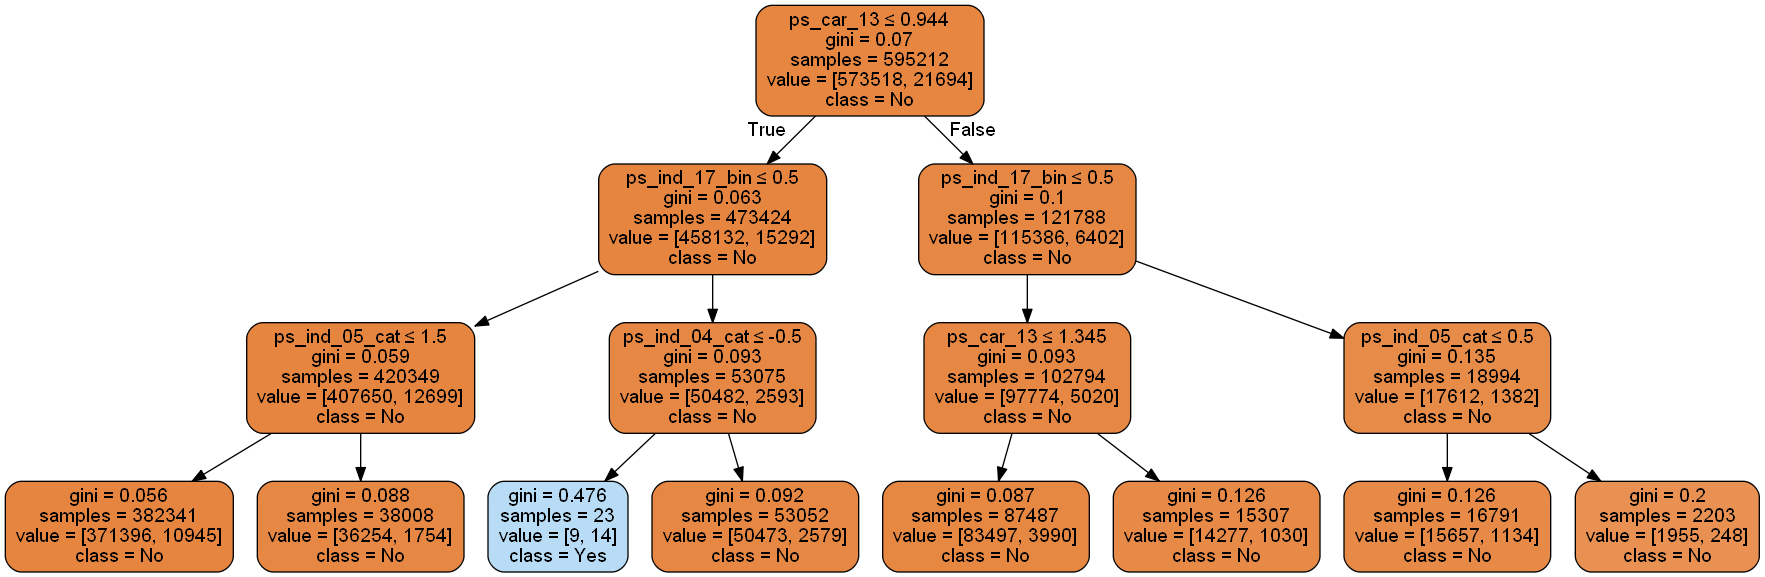

In [79]:
#Let us visualize the decision tree with the two most important variables
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image as PImage
from subprocess import check_call
from IPython.display import Image 
import pydotplus
import re
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
# print(os.environ["PATH"])

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(train.drop(['target'],axis=1), train.target)

dot_data = StringIO()

tree.export_graphviz(decision_tree,
                              out_file=dot_data,
                              feature_names = train.drop(['target'],axis=1).columns.values,
                              class_names = ['No', 'Yes'],
                              filled=True, 
                            rounded=True,
                        special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [119]:
#Let us build the Desicion tree and Random forest with same depth and plot their ROC curves
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#split the train sample in training, validation and test samples
X_train, X_test, y_train, y_test = train_test_split(train.drop(['target'],axis=1), train.target, 
                                                    test_size=.4, random_state=0, stratify=train.target)

#fit tree with depth 5
dtc = tree.DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict_proba(X_test)


#fit random forest with depth 5
rfc = RandomForestClassifier(n_estimators=150, max_depth=5)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict_proba(X_test)

Text(0.5, 0, 'False Positive Rate')

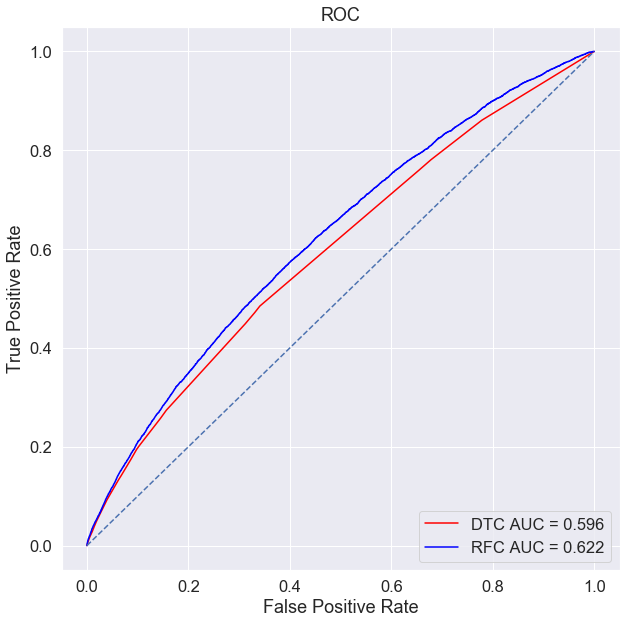

In [110]:
#visualize the ROC curves
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc_y_pred[:,1])
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_y_pred[:,1])
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot(fpr_dtc,tpr_dtc, color='red',label = 'DTC AUC = %0.3f' % roc_auc_dtc)
plt.plot(fpr_rfc,tpr_rfc, color='blue',label = 'RFC AUC = %0.3f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Note: the top left corner of the plot is the “ideal” point - a false positive rate of zero, 
# and a true positive rate of one. It means that a larger area under the curve (AUC) is usually better.
# We can see that the random forest achieves a slightly higher AUC, i.e. for the same false positive rate (say 0.6),
# the random forest achieves a slightly better true positive rate than the decision tree.

In [169]:
#Let us find the optimal depth of the tree and forest by cross-validation and metric AUC
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#insert yout code...
dtc = tree.DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=150)
hyper_params = {'max_depth': [4, 5, 6]} # 10, 25, 50, 75, 100
auc_metric = metrics.roc_auc_score
scorer_auc_metric = metrics.make_scorer(auc_metric)

n = 8 # number of splits

tree_train_auc = np.zeros(n)
forest_train_auc = np.zeros(n)
tree_val_auc = np.zeros(n)
forest_val_auc = np.zeros(n)

#insert yout code...
# X_train, y_train = train.drop(['target'],axis=1), train.target
X_train_val, X_test, y_train_val, y_test = train_test_split(train.drop(['target'],axis=1), train.target, 
                                                    test_size=.4, random_state=0, stratify=train.target)
X_arr, y_arr = X_train.values, y_train.values

i, innercv_results, inner_best_model = 0, {}, {}
outer_folds = StratifiedKFold(n_splits=n, random_state=10)
inner_folds = StratifiedKFold(n_splits=n, random_state=10)
for (out_train, out_test) in outer_folds.split(X_arr, y_arr):
    i += 1
    Xtrain, Xtest = X_arr[out_train], X_arr[out_test]
    ytrain, ytest = y_arr[out_train], y_arr[out_test]
    
    fold_id = "fold_" + str(i)
    innercv_results[fold_id] = {}
    inner_best_model[fold_id] = {}
    # dtc
    print(f"Fold {i} Dtc")
    innercv_results[fold_id]['dtc'] = GridSearchCV(estimator=dtc, 
                                                        param_grid=hyper_params, 
                                                        scoring=scorer_auc_metric, 
                                                        cv=inner_folds)
    innercv_results[fold_id]['dtc'].fit(Xtrain, ytrain.ravel())
    inner_best_model[fold_id]['dtc'] = innercv_results[fold_id]['dtc'].best_estimator_
    
    # rfc
    print(f"Fold {i} Rfc")
    innercv_results[fold_id]['rfc'] = GridSearchCV(estimator=rfc, 
                                                        param_grid=hyper_params, 
                                                        scoring=scorer_auc_metric, 
                                                        cv=inner_folds)
    innercv_results[fold_id]['rfc'].fit(Xtrain, ytrain.ravel())
    inner_best_model[fold_id]['rfc'] = innercv_results[fold_id]['rfc'].best_estimator_
    
    # prediction
    y_train_pred = inner_best_model[fold_id]['dtc'].predict_proba(Xtrain)[:,1]
    tree_train_auc[i-1] = auc_metric(ytrain, y_train_pred)
    ytest_pred = inner_best_model[fold_id]['dtc'].predict_proba(Xtest)[:,1]
    tree_val_auc[i-1] = auc_metric(ytest, ytest_pred)
    y_train_pred = inner_best_model[fold_id]['rfc'].predict_proba(Xtrain)[:,1]
    forest_train_auc[i-1] = auc_metric(ytrain, y_train_pred)
    ytest_pred = inner_best_model[fold_id]['rfc'].predict_proba(Xtest)[:,1]
    forest_val_auc[i-1] = auc_metric(ytest, ytest_pred)
print("done.")

done.


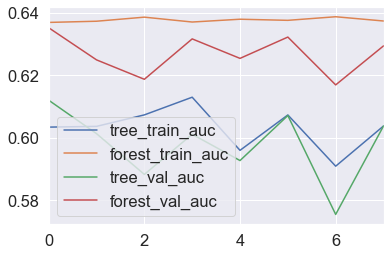

In [170]:
# Plot the performance curves
import pandas as pd
df = pd.DataFrame()
df['tree_train_auc'] = tree_train_auc
df['forest_train_auc'] = forest_train_auc
df['tree_val_auc'] = tree_val_auc
df['forest_val_auc'] = forest_val_auc
df.plot()

In [171]:
#chose the optimal tree depth
#insert yout code...
argmax = tree_val_auc.argmax()
fold_id_dt = "fold_" + str(argmax + 1)
best_depth_dt = innercv_results[fold_id_dt]['dtc'].best_params_['max_depth']
best_depth_dt

5

In [172]:
#optimal forest depth
#insert yout code...

argmax = forest_val_auc.argmax()
fold_id_rf = "fold_" + str(argmax + 1)
best_depth_rf = innercv_results[fold_id_rf]['rfc'].best_params_['max_depth']
best_depth_rf

6

Text(0.5, 0, 'False Positive Rate')

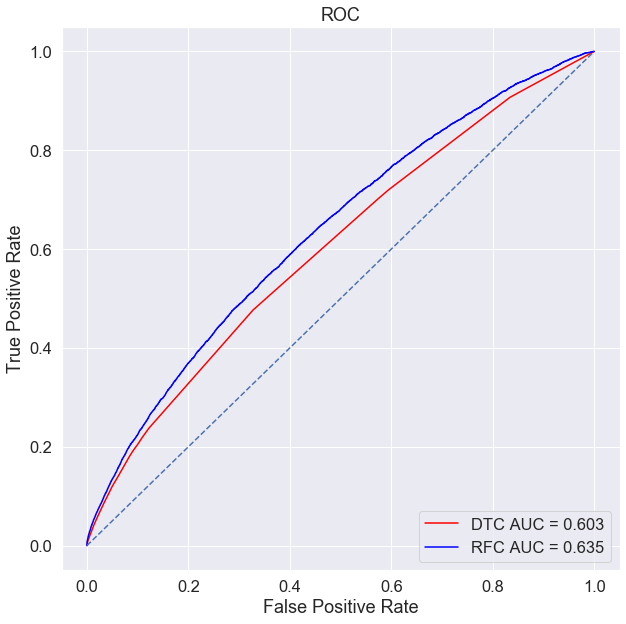

In [180]:
#plot final ROC-curves and commect what is your optimal model
best_dt = innercv_results[fold_id_dt]['dtc'].best_estimator_
dtc_y_pred = best_dt.predict_proba(X_test)


best_rf = innercv_results[fold_id_rf]['rfc'].best_estimator_
rfc_y_pred = best_rf.predict_proba(X_test)

# plot ROC-curves
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc_y_pred[:,1])
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_y_pred[:,1])
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot(fpr_dtc,tpr_dtc, color='red',label = 'DTC AUC = %0.3f' % roc_auc_dtc)
plt.plot(fpr_rfc,tpr_rfc, color='blue',label = 'RFC AUC = %0.3f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')